Name: Goktug Akca

ID: 191101073

Course: BIL570 /BIL470



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from math import sqrt

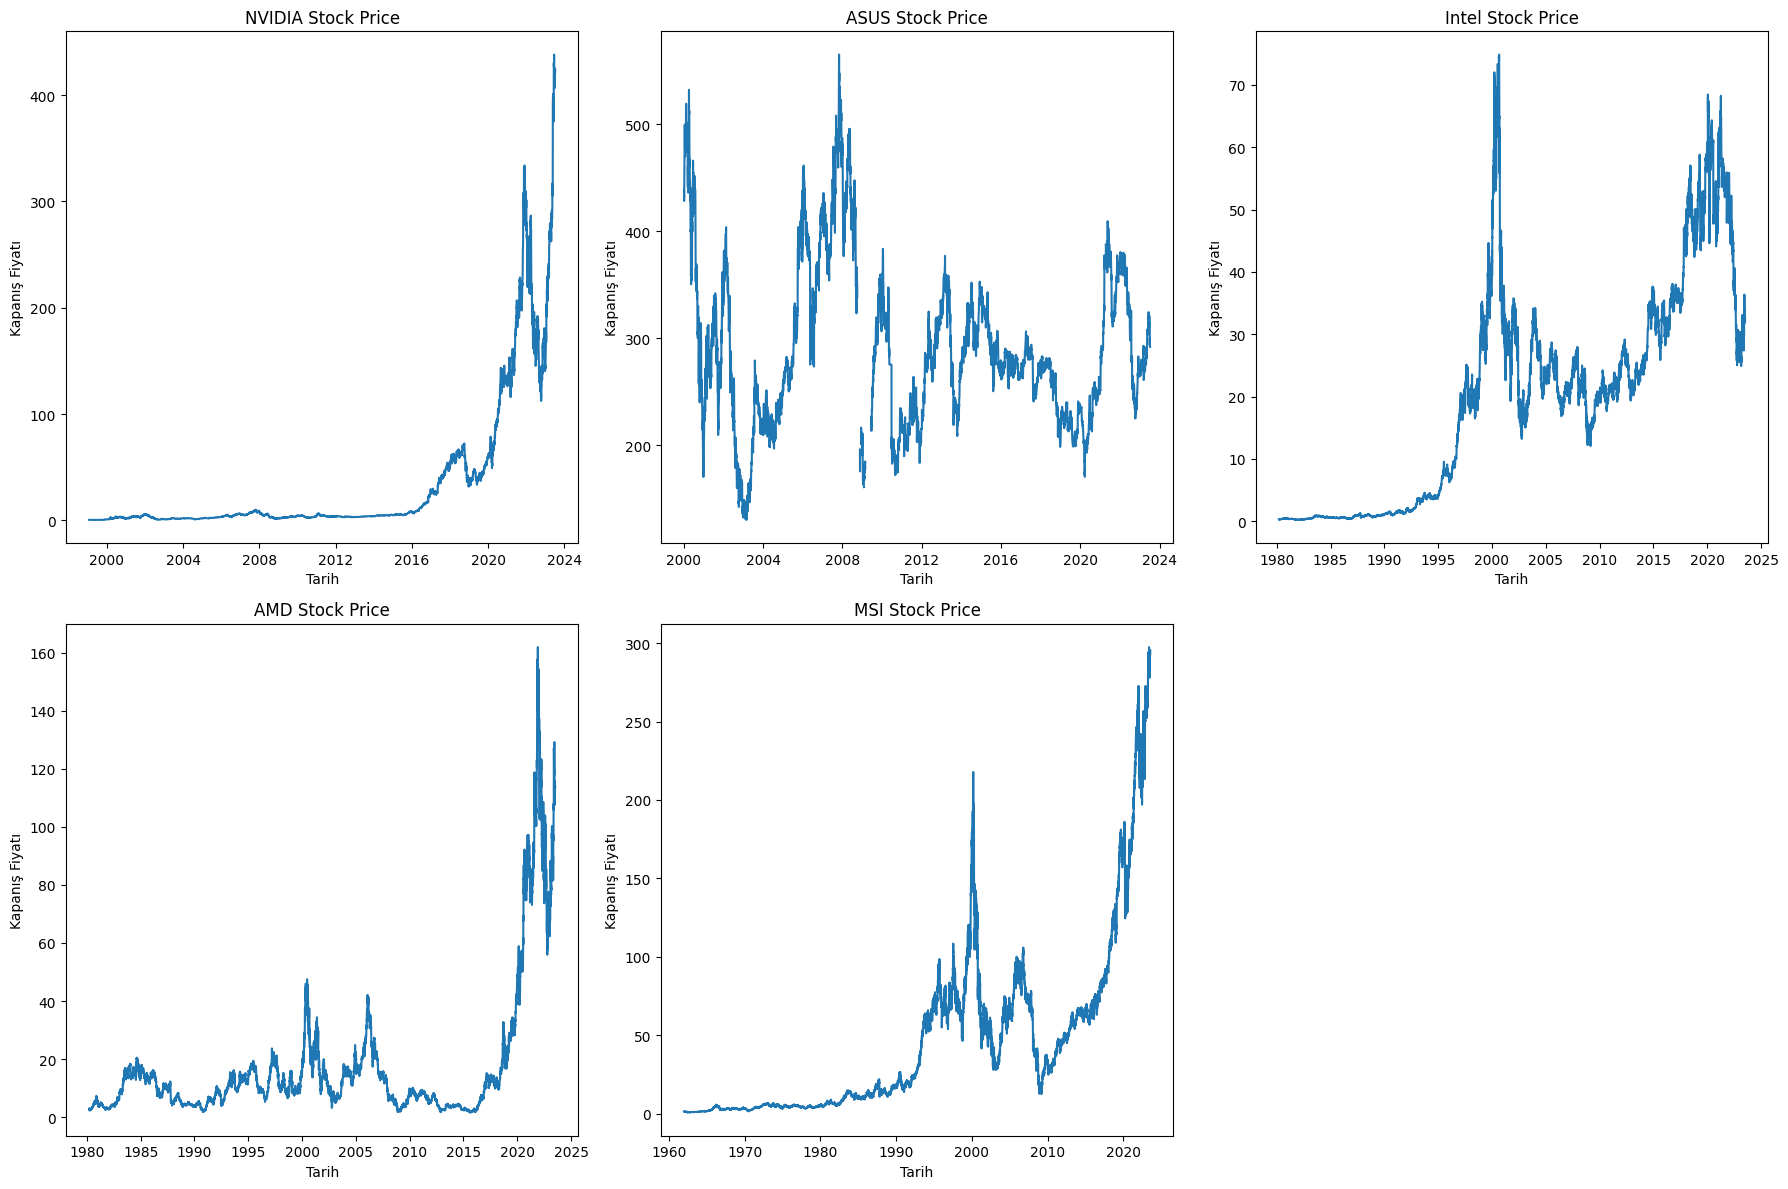

In [2]:
nvidia=pd.read_csv("NVIDIA (1999 -11.07.2023).csv")
asus=pd.read_csv("ASUS (2000 - 11.07.2023).csv")
intel=pd.read_csv("INTEL (1980 - 11.07.2023).csv")
amd=pd.read_csv("AMD (1980 -11.07.2023).csv")
msi=pd.read_csv("Motorola Solutions (MSI) (1962 -11.07.2023).csv")

# Date sütununu date time formatına çevirdim
nvidia['Date'] = pd.to_datetime(nvidia['Date'])
asus['Date'] = pd.to_datetime(asus['Date'])
intel['Date'] = pd.to_datetime(intel['Date'])
amd['Date'] = pd.to_datetime(amd['Date'])
msi['Date'] = pd.to_datetime(msi['Date'])

#her bir şirketin tarihe göre close'unu pyplot ile grafikleştridim

plt.figure(figsize=(18, 12))

# NVIDIA Grafik
plt.subplot(231)  # 2x3'lük bir alt-çizimde 1. grafik
plt.plot(nvidia['Date'], nvidia['Close'])
plt.title('NVIDIA Stock Price')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')

# ASUS Grafik
plt.subplot(232)  # 2x3'lük bir alt-çizimde 2. grafik
plt.plot(asus['Date'], asus['Close'])
plt.title('ASUS Stock Price')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')

# Intel Grafik
plt.subplot(233)  # 2x3'lük bir alt-çizimde 3. grafik
plt.plot(intel['Date'], intel['Close'])
plt.title('Intel Stock Price')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')

# AMD Grafik
plt.subplot(234)  # 2x3'lük bir alt-çizimde 4. grafik
plt.plot(amd['Date'], amd['Close'])
plt.title('AMD Stock Price')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')

# MSI Grafik
plt.subplot(235)  # 2x3'lük bir alt-çizimde 5. grafik
plt.plot(msi['Date'], msi['Close'])
plt.title('MSI Stock Price')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')

# Grafikleri ayarlayın ve gösterin
plt.tight_layout()  # Grafiklerin sıkışık olmasını önlemek için kullanılır
plt.show()

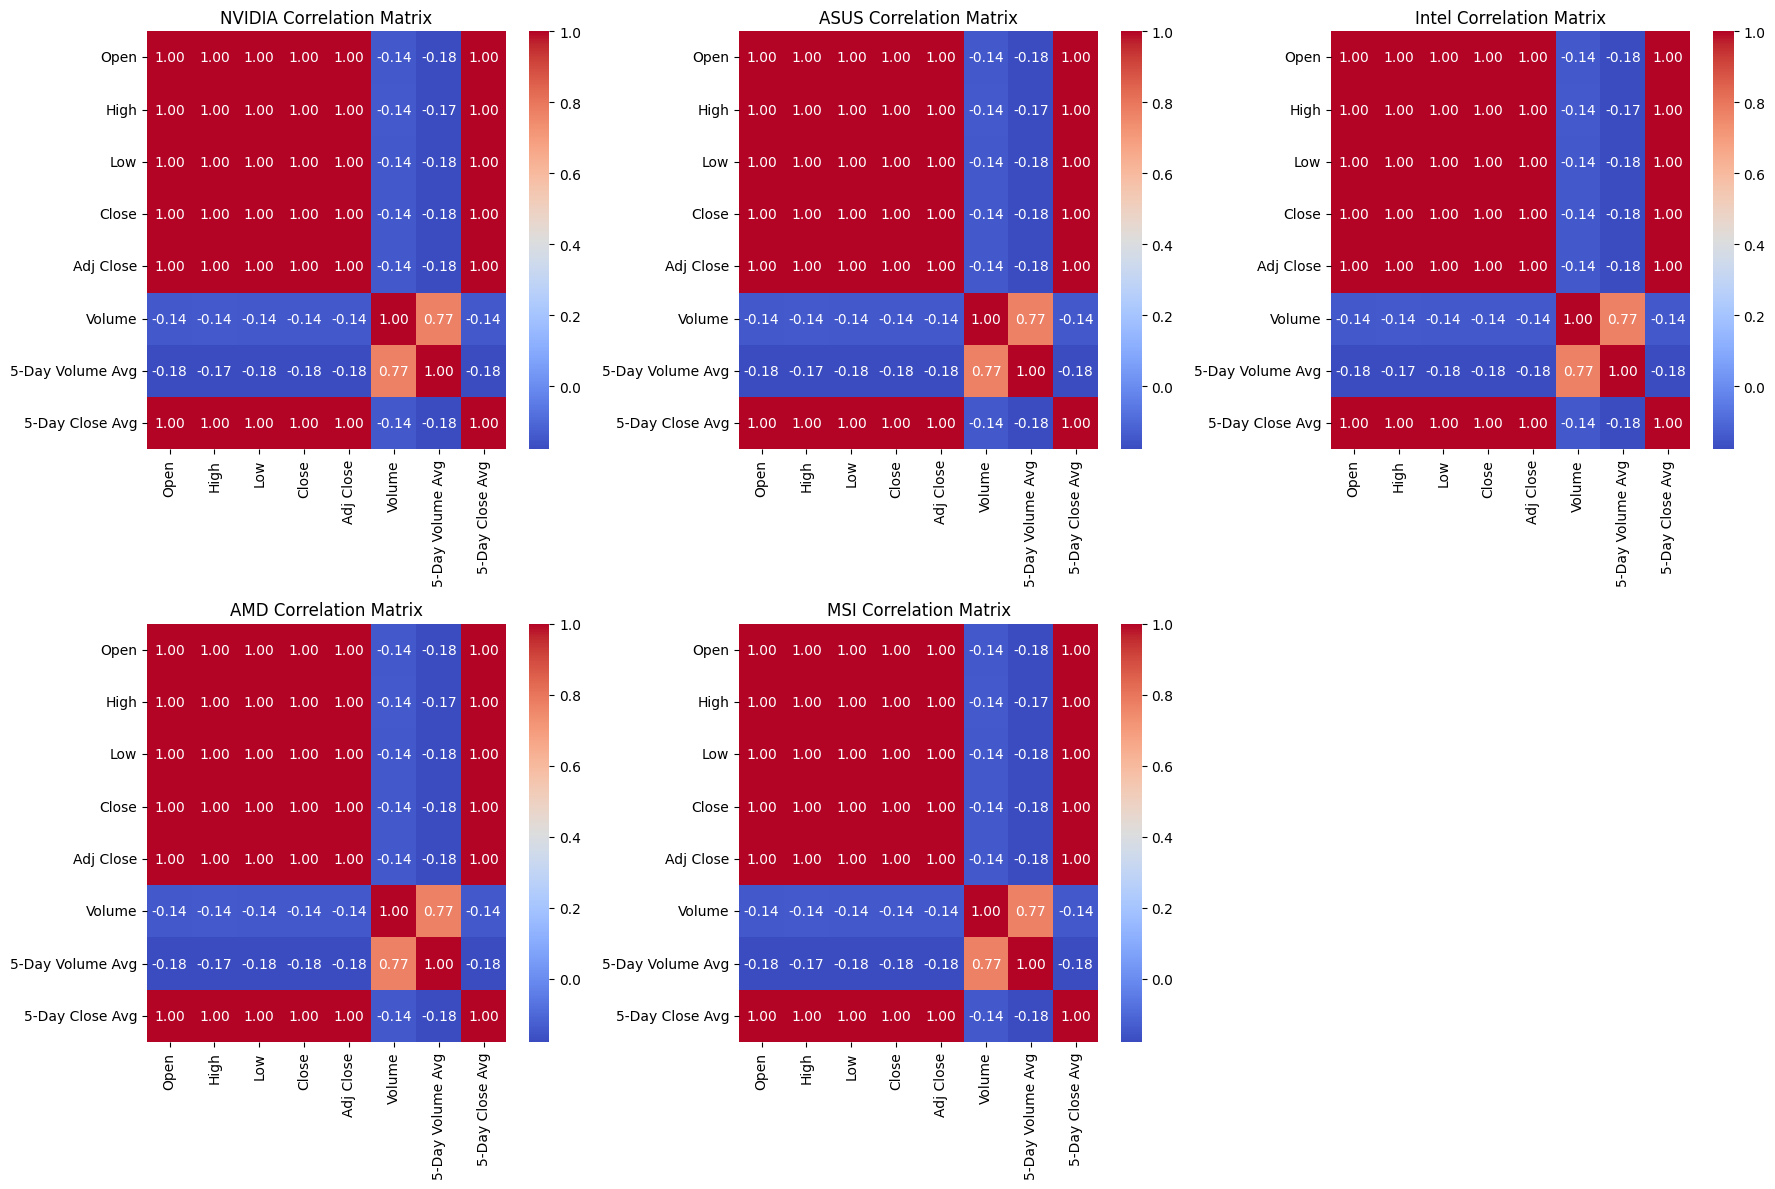

In [37]:
import seaborn as sns
plt.figure(figsize=(18, 12))
nvidia_x = nvidia.drop(columns=["Date"])
# NVIDIA Grafik
plt.subplot(231)  # 2x3'lük bir alt-çizimde 1. grafik
correlation_matrix = nvidia_x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('NVIDIA Correlation Matrix')

# ASUS Grafik
asus_x = nvidia.drop(columns=["Date"])
plt.subplot(232)  # 2x3'lük bir alt-çizimde 2. grafik
correlation_matrix = asus_x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('ASUS Correlation Matrix')

# Intel Grafik
intel_x = nvidia.drop(columns=["Date"])
plt.subplot(233)  # 2x3'lük bir alt-çizimde 3. grafik
correlation_matrix = intel_x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Intel Correlation Matrix')


# AMD Grafik
amd_X = nvidia.drop(columns=["Date"])
plt.subplot(234)  # 2x3'lük bir alt-çizimde 4. grafik
correlation_matrix = amd_X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('AMD Correlation Matrix')

# MSI Grafik
msi_x = nvidia.drop(columns=["Date"])
plt.subplot(235)  # 2x3'lük bir alt-çizimde 5. grafik
correlation_matrix = msi_x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('MSI Correlation Matrix')

# Grafikleri ayarlayın ve gösterin
plt.tight_layout()  # Grafiklerin sıkışık olmasını önlemek için kullanılır
plt.show()

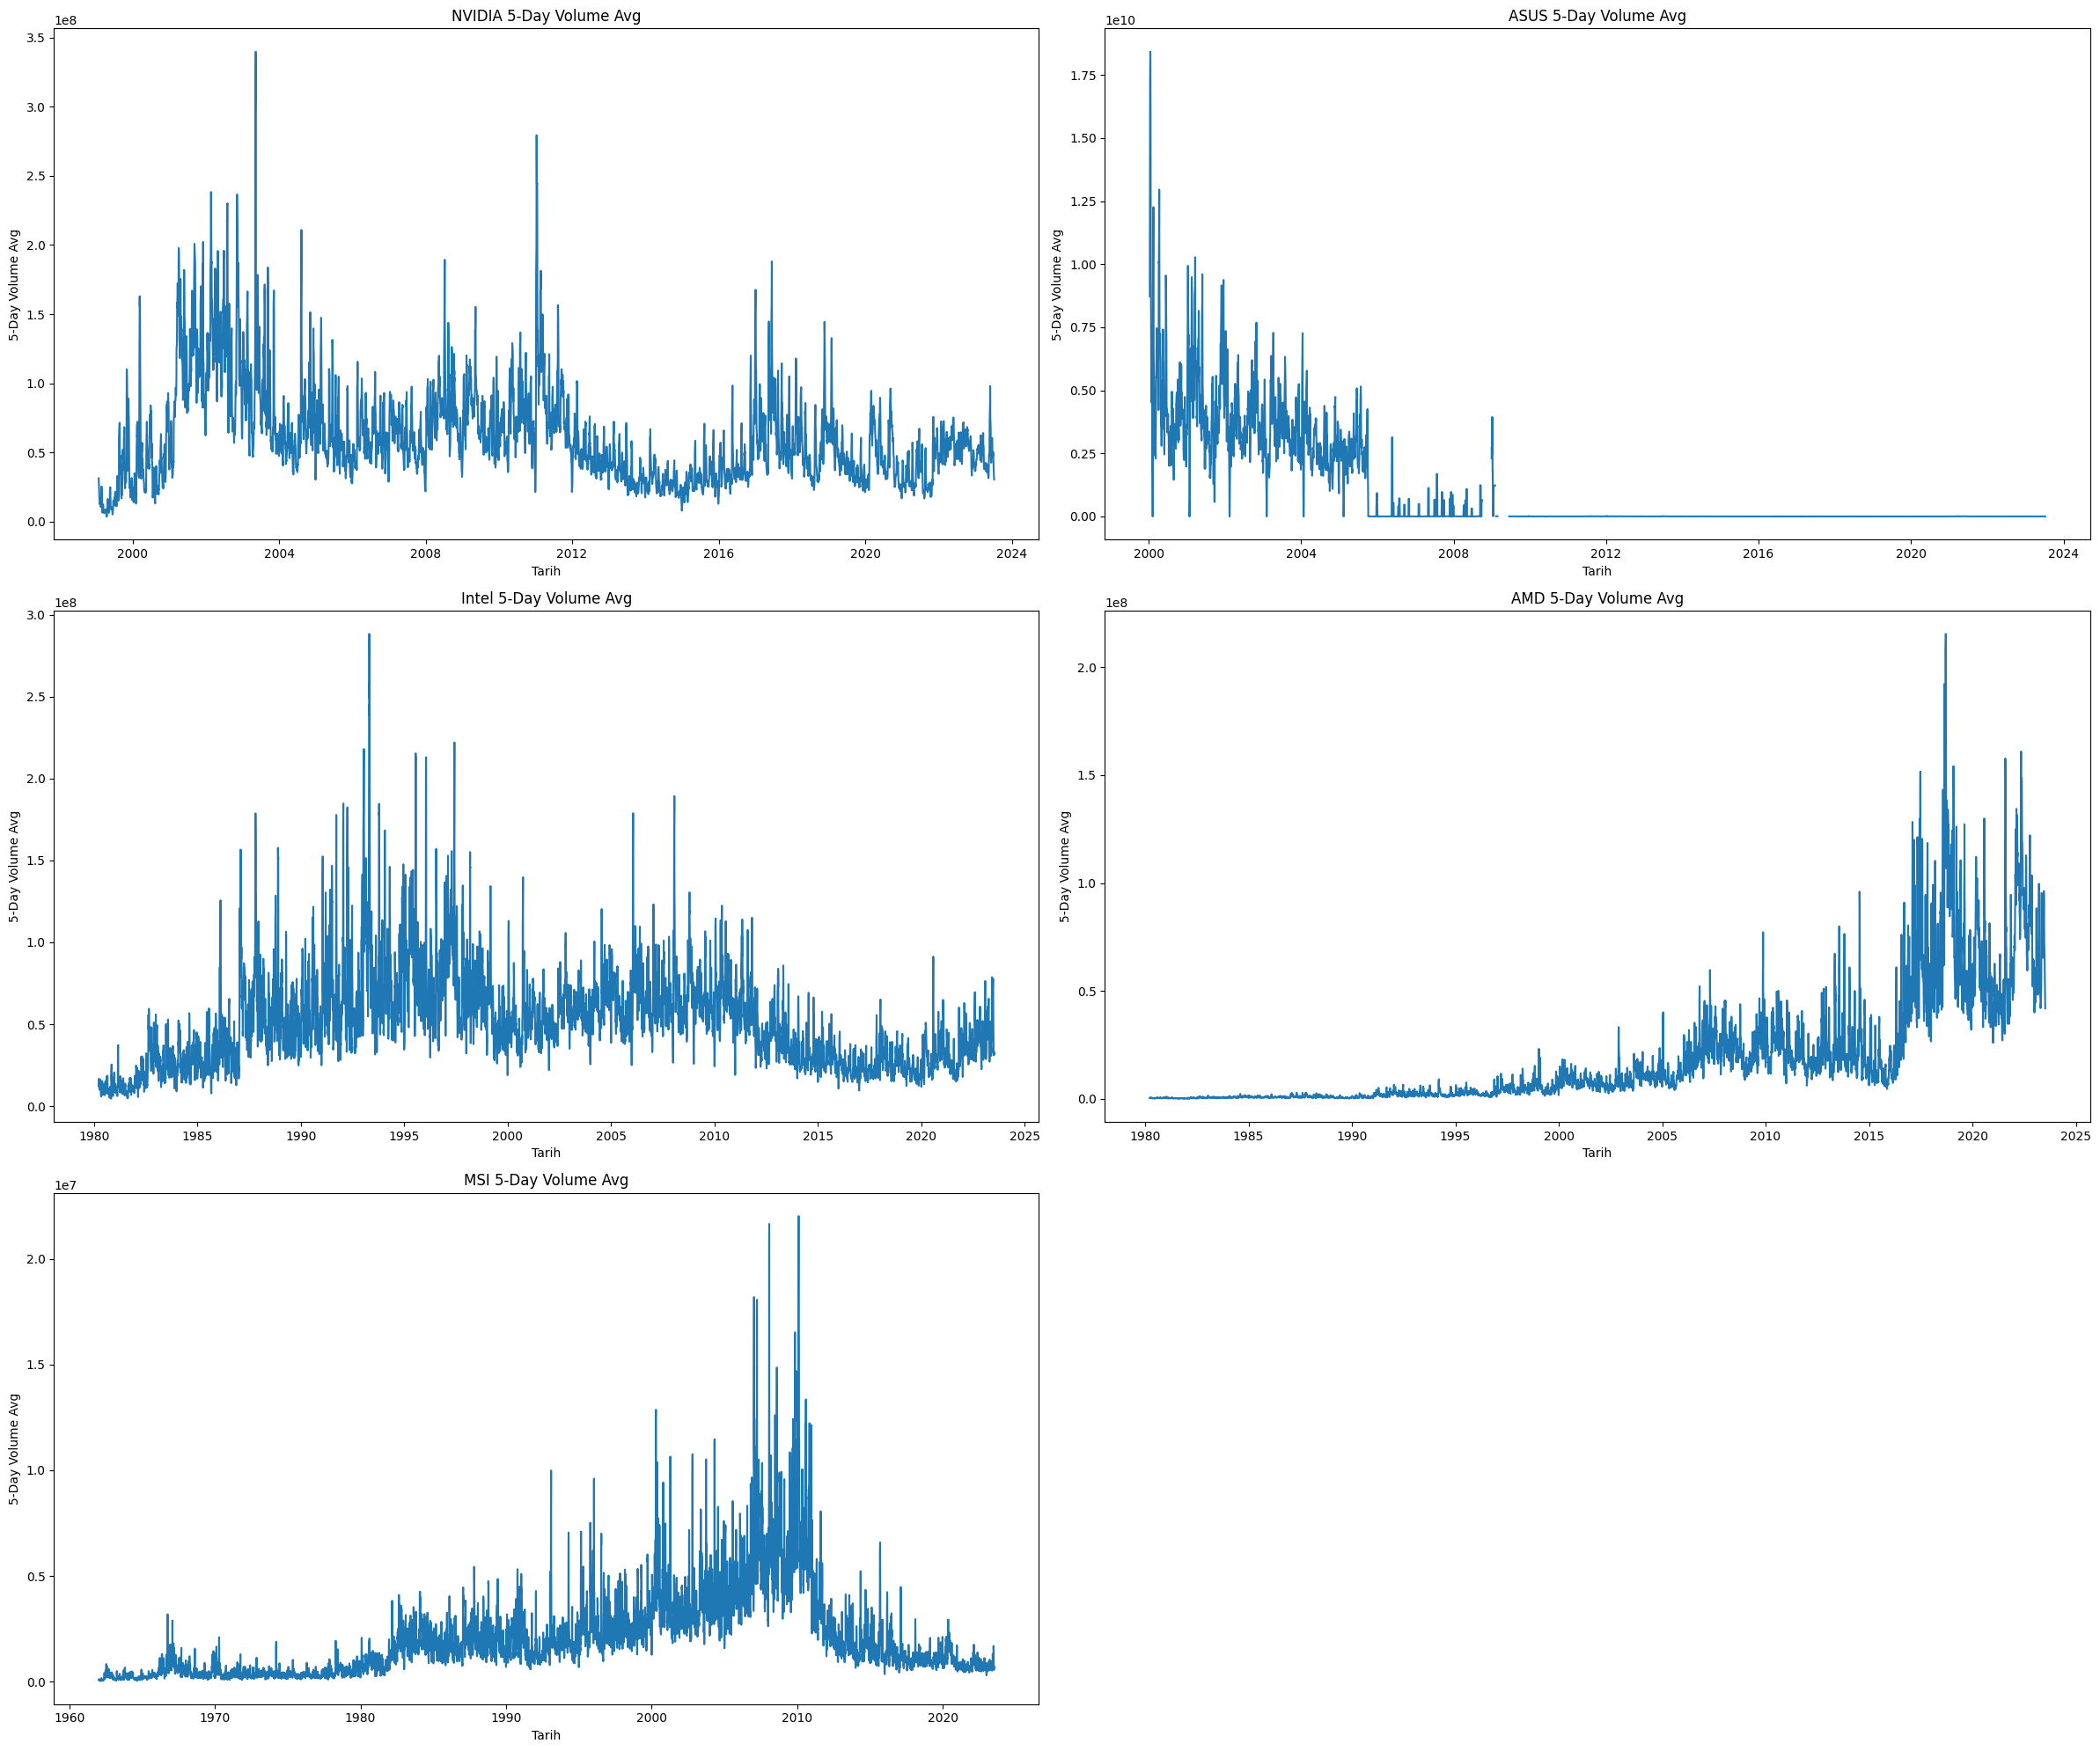

In [4]:
#5 günlük hacim performansı diye yeni bir özellik üretmenin hacmin geçmiş performanslarına
#dayalı gelecekteki fiyat hareketlerini anlamaya yardımcı olacağını düşündüm

plt.figure(figsize=(24, 20))
# 5 günlük ortalama hacmi hesaplayın
nvidia['5-Day Volume Avg'] = nvidia['Volume'].rolling(window=5).mean()
asus['5-Day Volume Avg'] = asus['Volume'].rolling(window=5).mean()
intel['5-Day Volume Avg'] = intel['Volume'].rolling(window=5).mean()
amd['5-Day Volume Avg'] = amd['Volume'].rolling(window=5).mean()
msi['5-Day Volume Avg'] = msi['Volume'].rolling(window=5).mean()

# NVIDIA Grafik
plt.subplot(321) # 1.grafik
plt.plot(nvidia['Date'], nvidia['5-Day Volume Avg'])
plt.title('NVIDIA 5-Day Volume Avg')
plt.xlabel('Tarih')
plt.ylabel('5-Day Volume Avg')

# ASUS Grafik
plt.subplot(322)  # 2. grafik
plt.plot(asus['Date'], asus['5-Day Volume Avg'])
plt.title('ASUS 5-Day Volume Avg')
plt.xlabel('Tarih')
plt.ylabel('5-Day Volume Avg')

# Intel Grafik
plt.subplot(323)  # 3. grafik
plt.plot(intel['Date'], intel['5-Day Volume Avg'])
plt.title('Intel 5-Day Volume Avg')
plt.xlabel('Tarih')
plt.ylabel('5-Day Volume Avg')

# AMD Grafik
plt.subplot(324)  # 4. grafik
plt.plot(amd['Date'], amd['5-Day Volume Avg'])
plt.title('AMD 5-Day Volume Avg')
plt.xlabel('Tarih')
plt.ylabel('5-Day Volume Avg')

# MSI Grafik
plt.subplot(325)  # 5. grafik
plt.plot(msi['Date'], msi['5-Day Volume Avg'])
plt.title('MSI 5-Day Volume Avg')
plt.xlabel('Tarih')
plt.ylabel('5-Day Volume Avg')

plt.tight_layout()
plt.show()

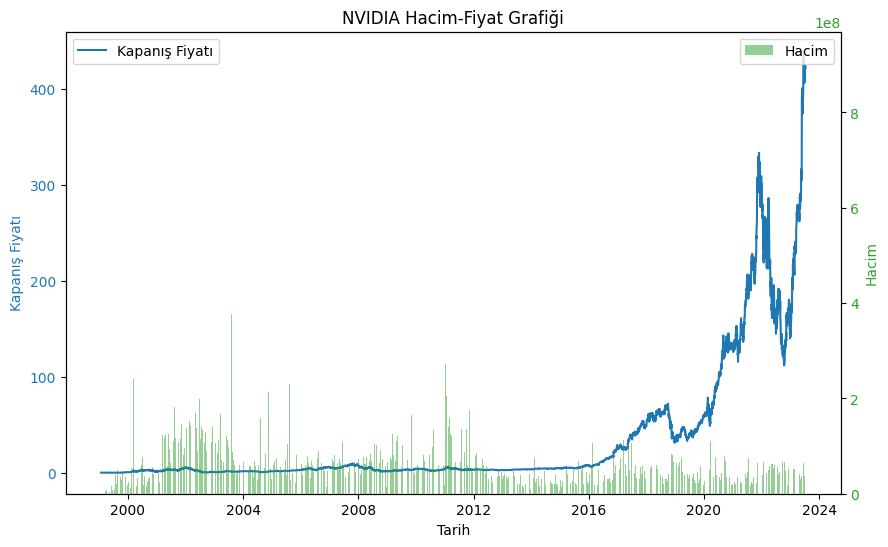

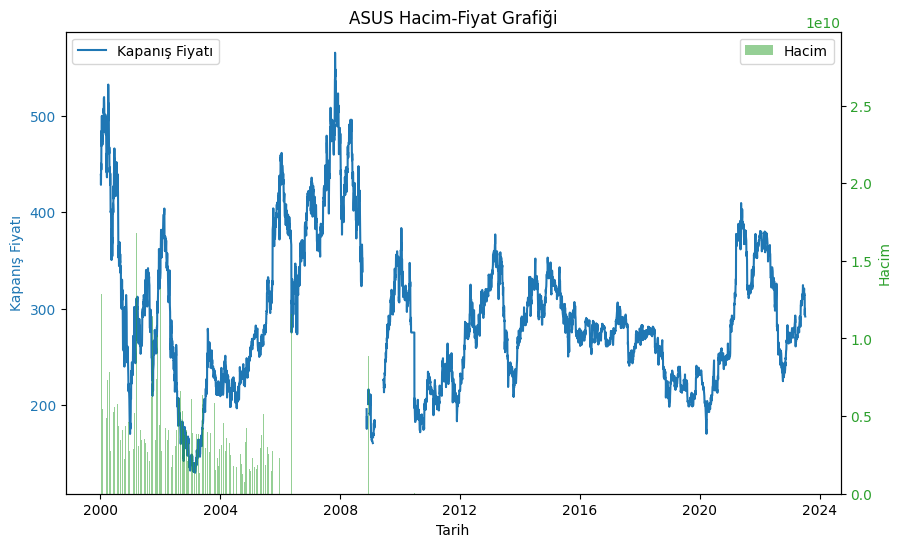

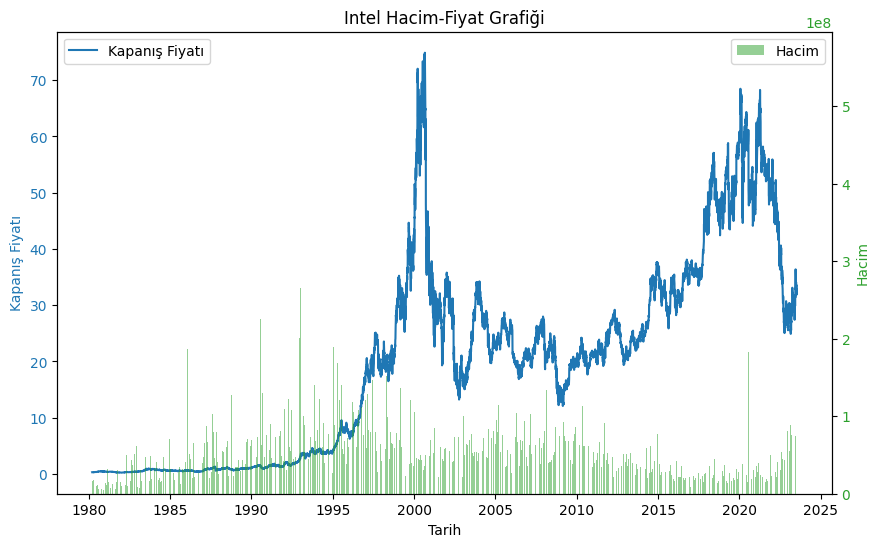

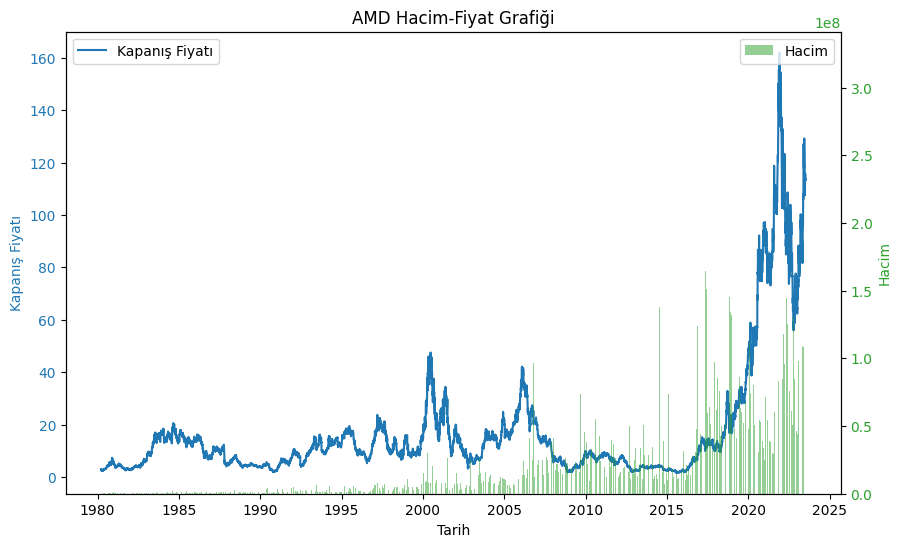

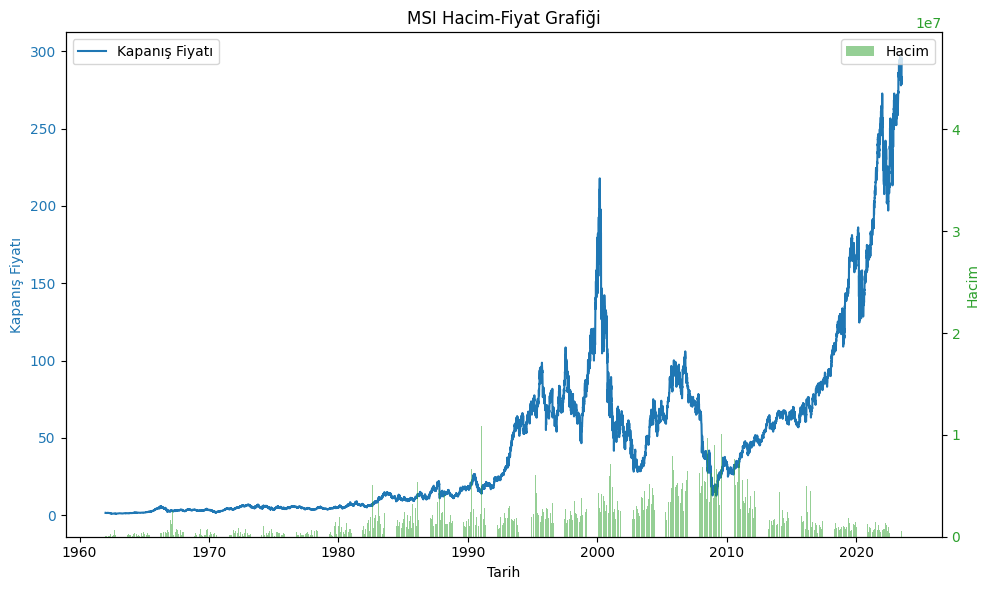

In [5]:
def plot_dual_axis(df, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Birinci eksen (sol): Kapanış Fiyatı
    color = 'tab:blue'
    ax1.set_xlabel('Tarih')
    ax1.set_ylabel('Kapanış Fiyatı', color=color)
    ax1.plot(df['Date'], df['Close'], color=color, label='Kapanış Fiyatı')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # İkinci eksen (sağ): Hacim
    ax2 = ax1.twinx()  # Aynı x ekseni kullan
    color = 'tab:green'
    ax2.set_ylabel('Hacim', color=color)
    ax2.bar(df['Date'], df['Volume'], color=color, alpha=0.5, label='Hacim')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.xticks(rotation=45)

# NVIDIA
plot_dual_axis(nvidia, 'NVIDIA Hacim-Fiyat Grafiği')

# ASUS
plot_dual_axis(asus, 'ASUS Hacim-Fiyat Grafiği')

# Intel
plot_dual_axis(intel, 'Intel Hacim-Fiyat Grafiği')

# AMD
plot_dual_axis(amd, 'AMD Hacim-Fiyat Grafiği')

# MSI
plot_dual_axis(msi, 'MSI Hacim-Fiyat Grafiği')

# Grafikleri ayarlayın ve gösterin
plt.tight_layout()
plt.show()

C:\Users\goktug.akca\AppData\Local\Temp\ipykernel_30456\3459037706.py:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(322)  # 3x2'lik bir alt-çizimde 2. grafik
C:\Users\goktug.akca\AppData\Local\Temp\ipykernel_30456\3459037706.py:55: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(323)  # 3x2'lik bir alt-çizimde 3. grafik
C:\Users\goktug.akca\AppData\Local\Temp\ipykernel_30456\3459037706.py:59: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(324)  # 3x2'lik bir alt-çizimde 4. grafik
C:\Users\goktug.akca\AppData\Local\Temp\ipykernel_30456\3459037706.py:63: Matpl

<Figure size 1800x1200 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

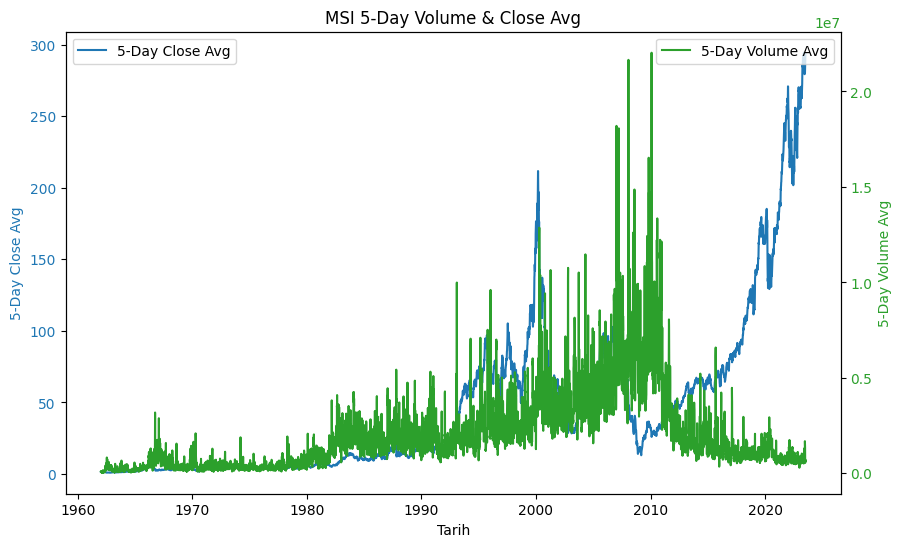

In [10]:
# 5 günlük ortalama hacmi hesaplayın
nvidia['5-Day Volume Avg'] = nvidia['Volume'].rolling(window=5).mean()
asus['5-Day Volume Avg'] = asus['Volume'].rolling(window=5).mean()
intel['5-Day Volume Avg'] = intel['Volume'].rolling(window=5).mean()
amd['5-Day Volume Avg'] = amd['Volume'].rolling(window=5).mean()
msi['5-Day Volume Avg'] = msi['Volume'].rolling(window=5).mean()

# 5 günlük ortalama kapanış fiyatını hesaplayın
nvidia['5-Day Close Avg'] = nvidia['Close'].rolling(window=5).mean()
asus['5-Day Close Avg'] = asus['Close'].rolling(window=5).mean()
intel['5-Day Close Avg'] = intel['Close'].rolling(window=5).mean()
amd['5-Day Close Avg'] = amd['Close'].rolling(window=5).mean()
msi['5-Day Close Avg'] = msi['Close'].rolling(window=5).mean()

# Grafik boyutunu ayarlayın
plt.figure(figsize=(18, 12))

# Her bir şirket için iki eksenli grafikler oluşturun
def plot_dual_axis(df, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Birinci eksen (sol): 5-Day Close Avg
    color = 'tab:blue'
    ax1.set_xlabel('Tarih')
    ax1.set_ylabel('5-Day Close Avg', color=color)
    ax1.plot(df['Date'], df['5-Day Close Avg'], color=color, label='5-Day Close Avg')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # İkinci eksen (sağ): 5-Day Volume Avg
    ax2 = ax1.twinx()  # Aynı x ekseni kullan
    color = 'tab:green'
    ax2.set_ylabel('5-Day Volume Avg', color=color)
    ax2.plot(df['Date'], df['5-Day Volume Avg'], color=color, label='5-Day Volume Avg')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.xticks(rotation=45)

plt.figure(figsize=(18, 12))

# Her bir şirket için iki eksenli grafikler oluşturun
def plot_dual_axis_subplot(df, title, subplot):
    plt.subplot(subplot)  
    plot_dual_axis(df, title)

# NVIDIA
plot_dual_axis_subplot(nvidia, 'NVIDIA 5-Day Volume & Close Avg', 321)  # 3x2'lik bir alt-çizimde 1. grafik

# ASUS
plot_dual_axis_subplot(asus, 'ASUS 5-Day Volume & Close Avg', 322)  # 3x2'lik bir alt-çizimde 2. grafik

# Intel
plot_dual_axis_subplot(intel, 'Intel 5-Day Volume & Close Avg', 323)  # 3x2'lik bir alt-çizimde 3. grafik

# AMD
plot_dual_axis_subplot(amd, 'AMD 5-Day Volume & Close Avg', 324)  # 3x2'lik bir alt-çizimde 4. grafik

# MSI
plot_dual_axis_subplot(msi, 'MSI 5-Day Volume & Close Avg', 325)  # 3x2'lik bir alt-çizimde 5. grafik

# Grafikleri ayarlayın ve gösterin
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

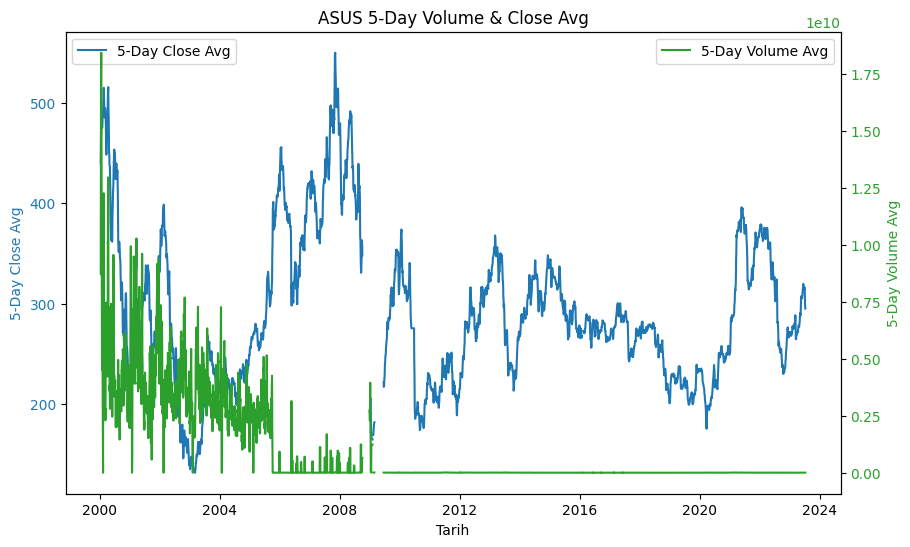

In [7]:
# ASUS
ax = plt.subplot(322)  # 3x2'lik bir alt-çizimde 2. grafik
plot_dual_axis(asus, 'ASUS 5-Day Volume & Close Avg')
ax.remove()  # Üst üste binme uyarısını kaldır

<Figure size 640x480 with 0 Axes>

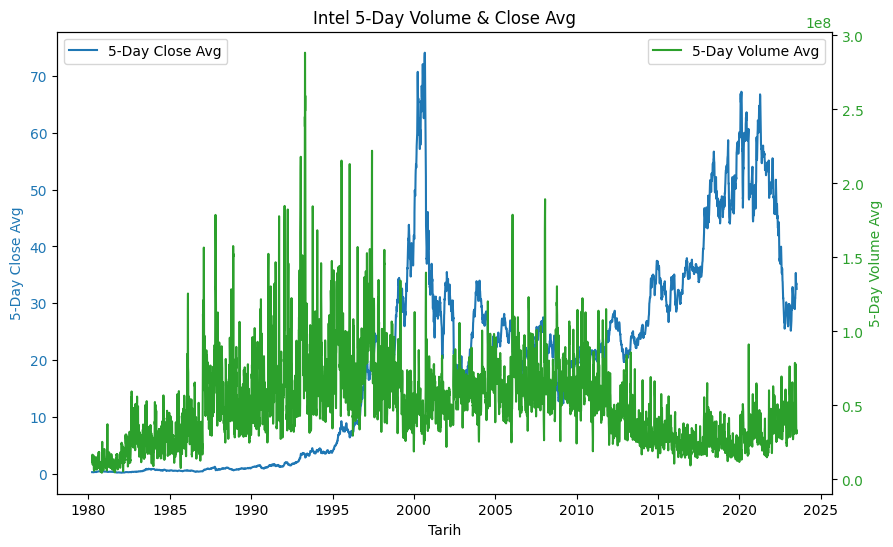

In [8]:

# Intel
ax = plt.subplot(323)  # 3x2'lik bir alt-çizimde 3. grafik
plot_dual_axis(intel, 'Intel 5-Day Volume & Close Avg')
ax.remove()  # Üst üste binme uyarısını kaldır

<Figure size 640x480 with 0 Axes>

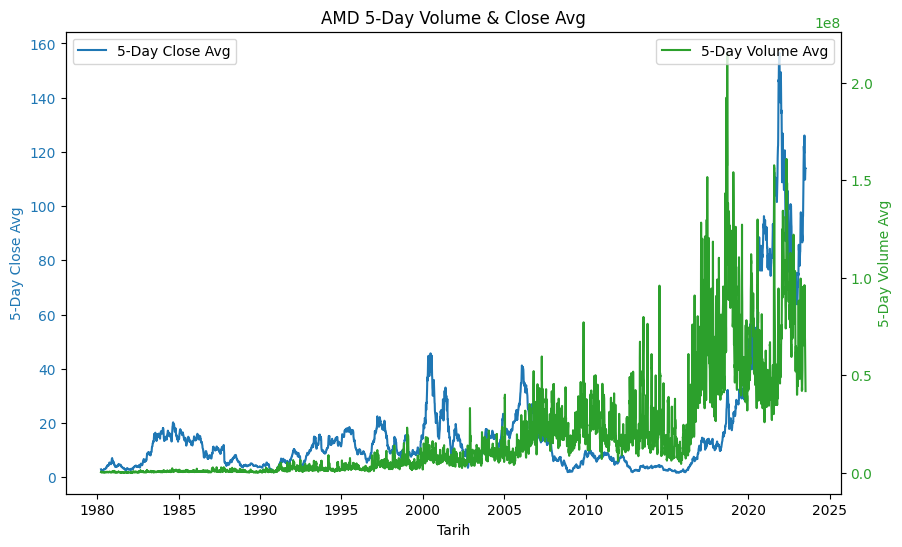

In [9]:
# AMD
ax = plt.subplot(324)  # 3x2'lik bir alt-çizimde 4. grafik
plot_dual_axis(amd, 'AMD 5-Day Volume & Close Avg')
ax.remove()  # Üst üste binme uyarısını kaldır

<Figure size 640x480 with 0 Axes>

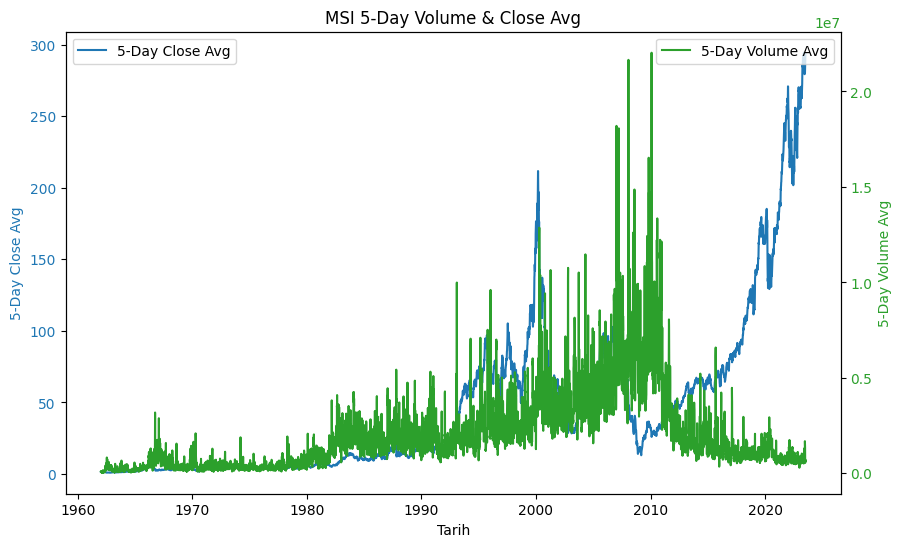

In [10]:
# MSI
ax = plt.subplot(325)  # 3x2'lik bir alt-çizimde 5. grafik
plot_dual_axis(msi, 'MSI 5-Day Volume & Close Avg')
ax.remove()  # Üst üste binme uyarısını kaldır

Iteration:      1,   Func. Count:      6,   Neg. LLF: 397098996.74810183
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1409720814.83946
Iteration:      3,   Func. Count:     21,   Neg. LLF: 9057.504107863535
Iteration:      4,   Func. Count:     26,   Neg. LLF: 150536.73638871574
Iteration:      5,   Func. Count:     40,   Neg. LLF: 9911.394132105495
Iteration:      6,   Func. Count:     46,   Neg. LLF: 8926.451476723254
Iteration:      7,   Func. Count:     52,   Neg. LLF: 8916.503843830962
Iteration:      8,   Func. Count:     58,   Neg. LLF: 8910.382066384187
Iteration:      9,   Func. Count:     63,   Neg. LLF: 8907.180690977882
Iteration:     10,   Func. Count:     68,   Neg. LLF: 8905.615694128017
Iteration:     11,   Func. Count:     73,   Neg. LLF: 8905.319579202089
Iteration:     12,   Func. Count:     78,   Neg. LLF: 8905.307629895768
Iteration:     13,   Func. Count:     83,   Neg. LLF: 8905.307502554937
Iteration:     14,   Func. Count:     88,   Neg. LLF: 8905.3074

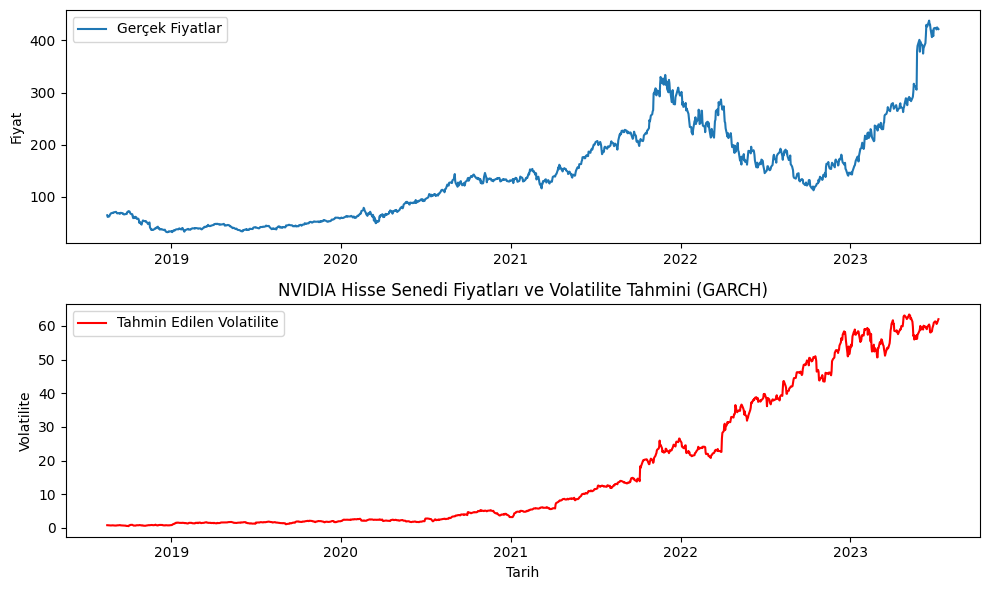

In [11]:
from arch import arch_model

# Verileri yükleyin veya oluşturun
data = pd.read_csv("NVIDIA (1999 -11.07.2023).csv")  # NVIDIA hisse senedi fiyatları örneği

# Verileri zaman serisi olarak indeksleyin
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Veriyi eğitim ve test setlerine bölelim
split_index = int(0.8 * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

# GARCH modelini otomatik olarak uyum sağlayacak şekilde eğitin
model = arch_model(train_data['Close'], vol='Garch')  # Otomatik p ve q seçimi
model_fit = model.fit()

# Volatilite tahminlerini yapın (sadece test verileri boyunca)
forecast_volatility = model_fit.conditional_volatility[-len(test_data):]

# Tahminleri ve gerçek değerleri görselleştirin
plt.figure(figsize=(10, 6))

# Gerçek fiyatlar
plt.subplot(2, 1, 1)
plt.plot(test_data['Close'], label='Gerçek Fiyatlar')
plt.ylabel('Fiyat')
plt.legend()

# Volatilite tahminleri
plt.subplot(2, 1, 2)
plt.plot(test_data.index, forecast_volatility, color='red', label='Tahmin Edilen Volatilite')
plt.xlabel('Tarih')
plt.ylabel('Volatilite')
plt.legend()

plt.title('NVIDIA Hisse Senedi Fiyatları ve Volatilite Tahmini (GARCH)')
plt.tight_layout()
plt.show()


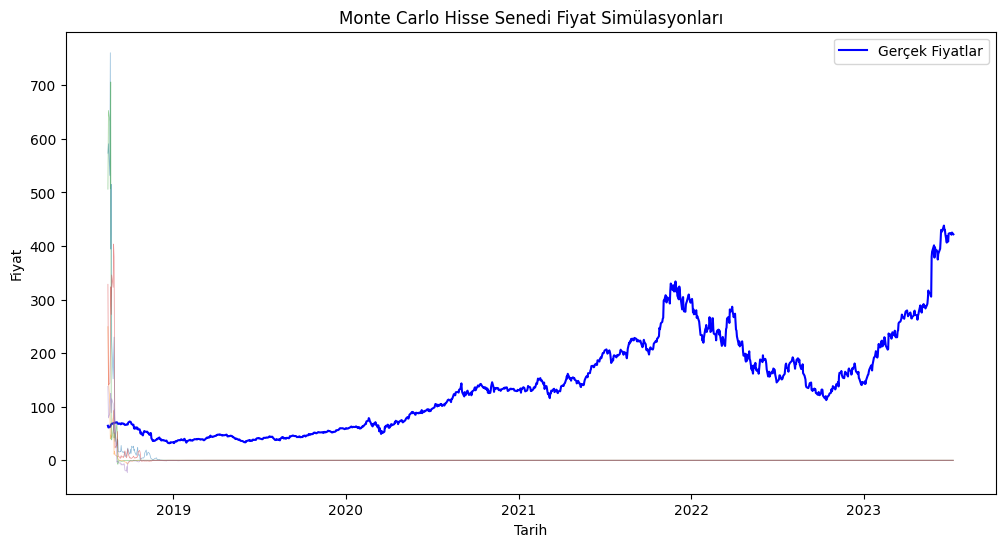

In [12]:
volatilities = np.clip(forecast_volatility.values.flatten(), 0.01, 0.5)

# Simülasyon parametreleri
num_simulations = 5  # Simülasyon sayısı
num_days = len(test_data)  # Test verileriyle aynı sayıda gün kullanın
simulation_results = np.empty((num_simulations, num_days))

for i in range(num_simulations):
    initial_price = test_data['Close'].iloc[-1]  # Test verilerinin son gününün kapanış fiyatıyla başlayın
    daily_returns = np.random.normal(0, volatilities, num_days)
    price_path = initial_price * np.cumprod(1 + daily_returns)
    simulation_results[i, :] = price_path

# Fiyat tahminlerini içeren DataFrame'i oluşturun
price_forecast = pd.DataFrame(simulation_results.T, columns=[f'Simulation {i+1}' for i in range(num_simulations)], index=test_data.index)

# Gerçek fiyatlar ve fiyat tahminlerini görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'], label='Gerçek Fiyatlar', color='blue')
for i in range(num_simulations):
    plt.plot(price_forecast.index, price_forecast[f'Simulation {i+1}'], lw=0.5, alpha=0.5)

plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.title('Monte Carlo Hisse Senedi Fiyat Simülasyonları')
plt.show()

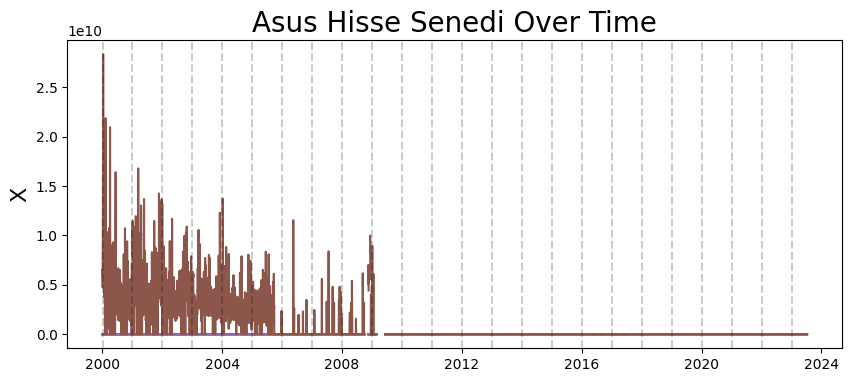

In [13]:
asus = pd.read_csv("ASUS (2000 - 11.07.2023).csv")
asus['Date'] = pd.to_datetime(asus['Date'])
asus.set_index('Date', inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(asus)
plt.title('Asus Hisse Senedi Over Time', fontsize=20)
plt.ylabel('X', fontsize=16)

# Veri çerçevesinin indeksini kullanarak yılları çizin
for year in range(asus.index.year.min(), asus.index.year.max() + 1):
    plt.axvline(asus.index[asus.index.year == year][0], color='k', linestyle='--', alpha=0.2)

plt.show()


<Figure size 1200x600 with 0 Axes>

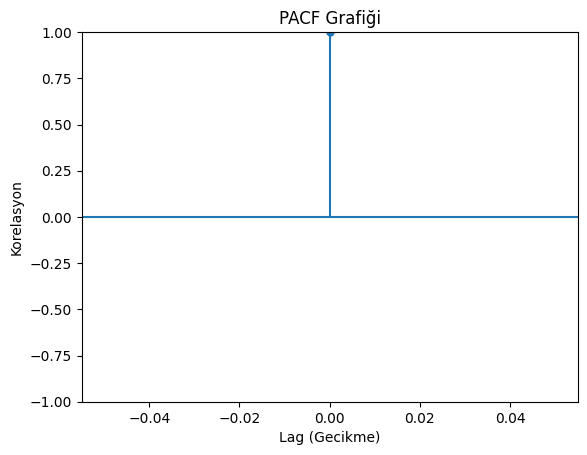

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ACF Grafiği
asus = pd.read_csv("ASUS (2000 - 11.07.2023).csv")
asus['Date'] = pd.to_datetime(asus['Date'])
asus.set_index('Date', inplace=True)
asus = asus.asfreq('B', method='ffill')
plt.figure(figsize=(12, 6))
plot_pacf(asus['Close'], lags=1)
plt.title('PACF Grafiği')
plt.xlabel('Lag (Gecikme)')
plt.ylabel('Korelasyon')
plt.show()

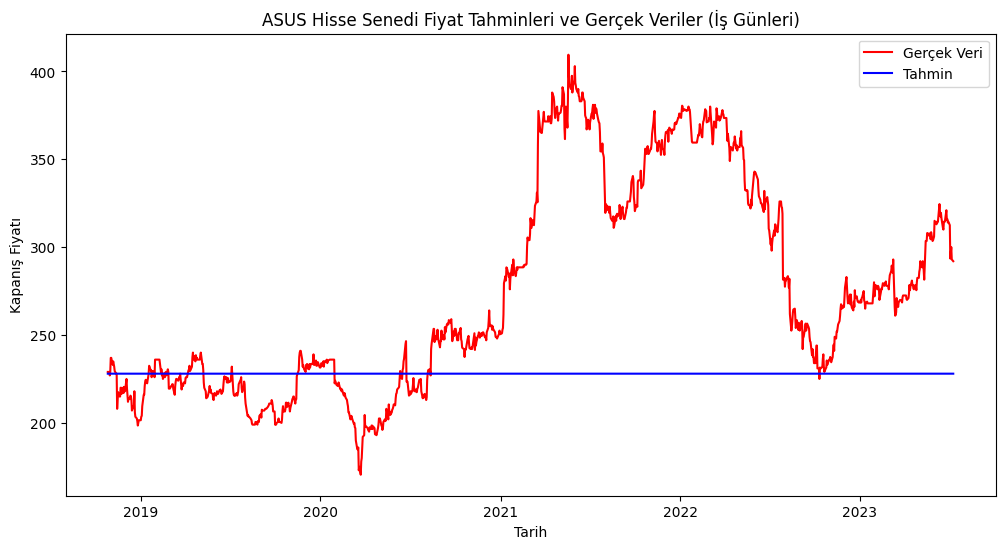

In [15]:
asus = pd.read_csv("ASUS (2000 - 11.07.2023).csv")
asus['Date'] = pd.to_datetime(asus['Date'])
asus.set_index('Date', inplace=True)
asus = asus.asfreq('B', method='ffill')

# Veriyi %80 eğitim ve %20 test olarak bölelim
split_ratio = 0.8
split_index = int(len(asus) * split_ratio)
train_data = asus.iloc[:split_index]
test_data = asus.iloc[split_index:]

# ARIMA modelini oluşturun ve eğitin
p, d, q = 0, 1, 0  # Örnek parametre değerleri, bu değerleri veriye göre ayarlamalısınız
model = ARIMA(train_data['Close'], order=(p, d, q))
model_fit = model.fit()

# Test verileri üzerinde tahmin yapın
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Tahminleri ve gerçek verileri aynı grafikte görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], color='red', label='Gerçek Veri')
plt.plot(test_data.index, forecast, color='blue', label='Tahmin')
plt.title('ASUS Hisse Senedi Fiyat Tahminleri ve Gerçek Veriler (İş Günleri)')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

Epoch 1/25
154/154 [==============================] - 4s 3ms/step - loss: 6.8014e-04
Epoch 2/25
154/154 [==============================] - 1s 3ms/step - loss: 2.2883e-05
Epoch 3/25
154/154 [==============================] - 1s 3ms/step - loss: 2.3628e-05
Epoch 4/25
154/154 [==============================] - 0s 3ms/step - loss: 1.9364e-05
Epoch 5/25
154/154 [==============================] - 1s 3ms/step - loss: 2.0886e-05
Epoch 6/25
154/154 [==============================] - 1s 3ms/step - loss: 1.9901e-05
Epoch 7/25
154/154 [==============================] - 1s 3ms/step - loss: 2.3539e-05
Epoch 8/25
154/154 [==============================] - 1s 3ms/step - loss: 2.1927e-05
Epoch 9/25
154/154 [==============================] - 1s 3ms/step - loss: 2.0530e-05
Epoch 10/25
154/154 [==============================] - 1s 4ms/step - loss: 2.2761e-05
Epoch 11/25
154/154 [==============================] - 1s 3ms/step - loss: 1.6602e-05
Epoch 12/25
154/154 [==============================] - 0s 3ms/s

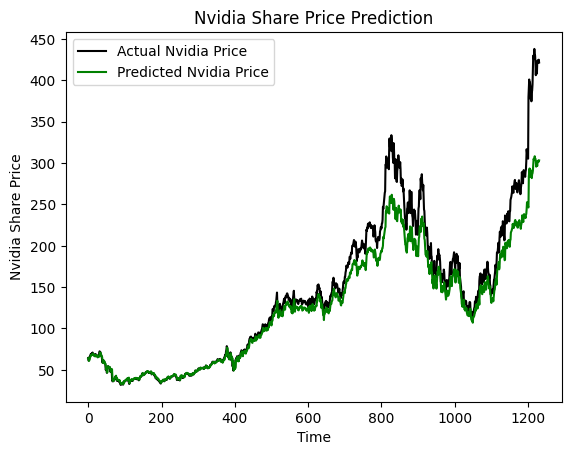

In [16]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

# Veriyi yükleyin (örnek bir CSV dosyası kullanılıyor)
df = pd.read_csv("NVIDIA (1999 -11.07.2023).csv", parse_dates=['Date'])

# Tarih aralıklarını belirtin
START_DATE = df['Date'].min()
END_DATE = df['Date'].max()

# Eğitim ve test verilerini ayırmak için oranı belirtin
SPLIT_RATIO = 0.8



def load_data(start, end):
    dataframe = df.copy()
    dataframe = dataframe.loc[(dataframe['Date'] >= start) & (dataframe['Date'] <= end), :]
    dataframe = dataframe.rename(columns={'Closing_Price': 'Close'})
    return dataframe

data = load_data(start=START_DATE, end=END_DATE)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Geliştirilmiş LSTM modelini oluşturun
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

# Eğitim ve test verilerini bölmek için indeksi hesaplayın
split_index = int(len(scaled_data) * SPLIT_RATIO)

# Eğitim verileri
x_train = scaled_data[:split_index - 1]
y_train = scaled_data[1:split_index]

# Test verileri
x_test = scaled_data[split_index - 1:-1]
y_test = scaled_data[split_index:]

# Modeli oluşturun ve derleyin
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [17]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 763.1624181945153


Epoch 1/25
154/154 [==============================] - 4s 3ms/step - loss: 6.0502e-04
Epoch 2/25
154/154 [==============================] - 1s 3ms/step - loss: 1.6379e-05
Epoch 3/25
154/154 [==============================] - 1s 3ms/step - loss: 1.5153e-05
Epoch 4/25
154/154 [==============================] - 1s 3ms/step - loss: 1.7572e-05
Epoch 5/25
154/154 [==============================] - 1s 4ms/step - loss: 1.5886e-05
Epoch 6/25
154/154 [==============================] - 1s 3ms/step - loss: 1.4608e-05
Epoch 7/25
154/154 [==============================] - 1s 4ms/step - loss: 1.5077e-05
Epoch 8/25
154/154 [==============================] - 1s 3ms/step - loss: 1.5779e-05
Epoch 9/25
154/154 [==============================] - 1s 3ms/step - loss: 1.6512e-05
Epoch 10/25
154/154 [==============================] - 1s 3ms/step - loss: 1.2991e-05
Epoch 11/25
154/154 [==============================] - 1s 3ms/step - loss: 1.4222e-05
Epoch 12/25
154/154 [==============================] - 1s 3ms/s

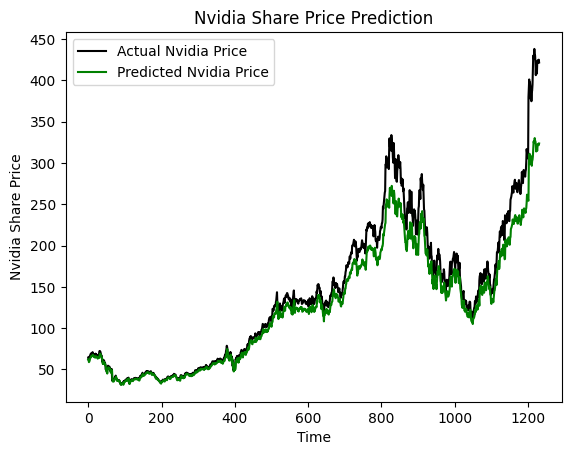

In [18]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error


# Tarih aralıklarını belirtin
START_DATE = df['Date'].min()
END_DATE = df['Date'].max()

# Eğitim ve test verilerini ayırmak için oranı belirtin
SPLIT_RATIO = 0.8

# Veriyi yükleyin (örnek bir CSV dosyası kullanılıyor)
df = pd.read_csv("NVIDIA (1999 -11.07.2023).csv", parse_dates=['Date'])

def load_data(start, end):
    dataframe = df.copy()
    dataframe = dataframe.loc[(dataframe['Date'] >= start) & (dataframe['Date'] <= end), :]
    dataframe = dataframe.rename(columns={'Closing_Price': 'Close'})
    return dataframe

data = load_data(start=START_DATE, end=END_DATE)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Geliştirilmiş LSTM modelini oluşturun
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

# Eğitim ve test verilerini bölmek için indeksi hesaplayın
split_index = int(len(scaled_data) * SPLIT_RATIO)

# Eğitim verileri
x_train = scaled_data[:split_index - 1]
y_train = scaled_data[1:split_index]

# Test verileri
x_test = scaled_data[split_index - 1:-1]
y_test = scaled_data[split_index:]

# Modeli oluşturun ve derleyin
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [19]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 610.0184388549922


Epoch 1/25
154/154 [==============================] - 5s 6ms/step - loss: 5.0206e-04
Epoch 2/25
154/154 [==============================] - 1s 6ms/step - loss: 1.3674e-05
Epoch 3/25
154/154 [==============================] - 1s 6ms/step - loss: 1.0758e-05
Epoch 4/25
154/154 [==============================] - 1s 6ms/step - loss: 9.2381e-06
Epoch 5/25
154/154 [==============================] - 1s 6ms/step - loss: 1.2523e-05
Epoch 6/25
154/154 [==============================] - 1s 6ms/step - loss: 1.0656e-05
Epoch 7/25
154/154 [==============================] - 1s 6ms/step - loss: 1.0583e-05
Epoch 8/25
154/154 [==============================] - 1s 6ms/step - loss: 1.1443e-05
Epoch 9/25
154/154 [==============================] - 1s 6ms/step - loss: 1.1298e-05
Epoch 10/25
154/154 [==============================] - 1s 6ms/step - loss: 9.0699e-06
Epoch 11/25
154/154 [==============================] - 1s 6ms/step - loss: 1.1069e-05
Epoch 12/25
154/154 [==============================] - 1s 6ms/s

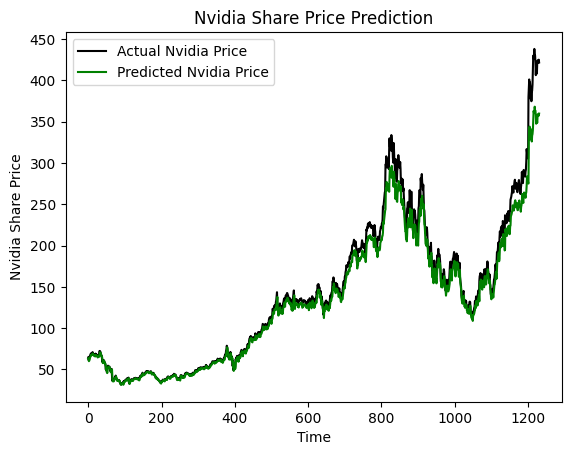

In [20]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

# Eğitim ve test verilerini bölmek için indeksi hesaplayın
split_index = int(len(scaled_data) * SPLIT_RATIO)

# Eğitim verileri
x_train = scaled_data[:split_index - 1]
y_train = scaled_data[1:split_index]

# Test verileri
x_test = scaled_data[split_index - 1:-1]
y_test = scaled_data[split_index:]

# Modeli oluşturun ve derleyin
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [21]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 238.8666303683143


Epoch 1/25
154/154 [==============================] - 5s 6ms/step - loss: 5.6623e-04
Epoch 2/25
154/154 [==============================] - 1s 6ms/step - loss: 2.8095e-05
Epoch 3/25
154/154 [==============================] - 1s 6ms/step - loss: 2.4762e-05
Epoch 4/25
154/154 [==============================] - 1s 6ms/step - loss: 2.2768e-05
Epoch 5/25
154/154 [==============================] - 1s 6ms/step - loss: 2.1152e-05
Epoch 6/25
154/154 [==============================] - 1s 6ms/step - loss: 2.3551e-05
Epoch 7/25
154/154 [==============================] - 1s 6ms/step - loss: 2.0612e-05
Epoch 8/25
154/154 [==============================] - 1s 6ms/step - loss: 2.7572e-05
Epoch 9/25
154/154 [==============================] - 1s 6ms/step - loss: 2.6657e-05
Epoch 10/25
154/154 [==============================] - 1s 6ms/step - loss: 2.2815e-05
Epoch 11/25
154/154 [==============================] - 1s 6ms/step - loss: 2.7343e-05
Epoch 12/25
154/154 [==============================] - 1s 6ms/s

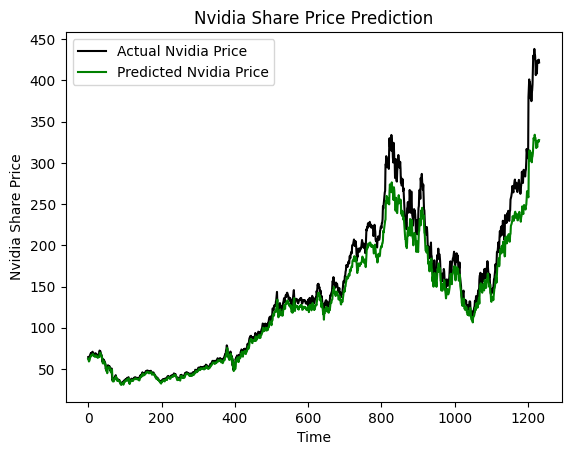

In [22]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=128))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    return model

# Eğitim ve test verilerini bölmek için indeksi hesaplayın
split_index = int(len(scaled_data) * SPLIT_RATIO)

# Eğitim verileri
x_train = scaled_data[:split_index - 1]
y_train = scaled_data[1:split_index]

# Test verileri
x_test = scaled_data[split_index - 1:-1]
y_test = scaled_data[split_index:]

# Modeli oluşturun ve derleyin
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [23]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 519.0596316863542


Epoch 1/25
154/154 [==============================] - 4s 6ms/step - loss: 4.5239e-04
Epoch 2/25
154/154 [==============================] - 1s 6ms/step - loss: 7.7518e-06
Epoch 3/25
154/154 [==============================] - 1s 6ms/step - loss: 5.6509e-06
Epoch 4/25
154/154 [==============================] - 1s 6ms/step - loss: 4.6833e-06
Epoch 5/25
154/154 [==============================] - 1s 6ms/step - loss: 5.6533e-06
Epoch 6/25
154/154 [==============================] - 1s 6ms/step - loss: 5.5149e-06
Epoch 7/25
154/154 [==============================] - 1s 6ms/step - loss: 5.7561e-06
Epoch 8/25
154/154 [==============================] - 1s 6ms/step - loss: 5.5729e-06
Epoch 9/25
154/154 [==============================] - 1s 5ms/step - loss: 6.0951e-06
Epoch 10/25
154/154 [==============================] - 1s 6ms/step - loss: 5.4422e-06
Epoch 11/25
154/154 [==============================] - 1s 6ms/step - loss: 6.3590e-06
Epoch 12/25
154/154 [==============================] - 1s 6ms/s

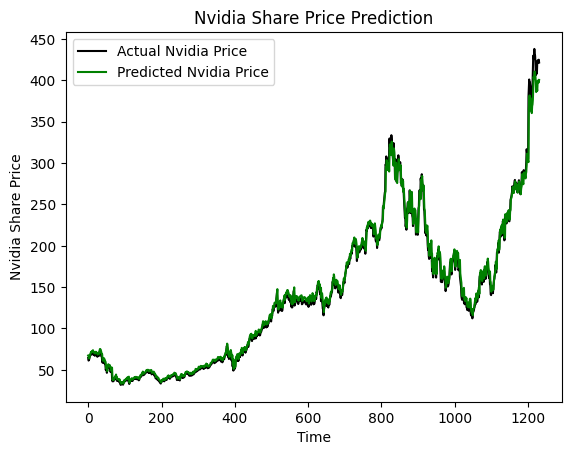

In [24]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.1))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(units=128))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))
    return model

# Eğitim ve test verilerini bölmek için indeksi hesaplayın
split_index = int(len(scaled_data) * SPLIT_RATIO)

# Eğitim verileri
x_train = scaled_data[:split_index - 1]
y_train = scaled_data[1:split_index]

# Test verileri
x_test = scaled_data[split_index - 1:-1]
y_test = scaled_data[split_index:]

# Modeli oluşturun ve derleyin
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [25]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 52.53152151716181


Epoch 1/25
154/154 [==============================] - 4s 4ms/step - loss: 6.5689e-04
Epoch 2/25
154/154 [==============================] - 1s 4ms/step - loss: 4.0025e-05
Epoch 3/25
154/154 [==============================] - 1s 4ms/step - loss: 4.2998e-05
Epoch 4/25
154/154 [==============================] - 1s 4ms/step - loss: 4.4354e-05
Epoch 5/25
154/154 [==============================] - 1s 4ms/step - loss: 4.6805e-05
Epoch 6/25
154/154 [==============================] - 1s 4ms/step - loss: 3.6993e-05
Epoch 7/25
154/154 [==============================] - 1s 4ms/step - loss: 3.6457e-05
Epoch 8/25
154/154 [==============================] - 1s 4ms/step - loss: 4.2381e-05
Epoch 9/25
154/154 [==============================] - 1s 4ms/step - loss: 3.4500e-05
Epoch 10/25
154/154 [==============================] - 1s 4ms/step - loss: 3.6158e-05
Epoch 11/25
154/154 [==============================] - 1s 4ms/step - loss: 3.1323e-05
Epoch 12/25
154/154 [==============================] - 1s 4ms/s

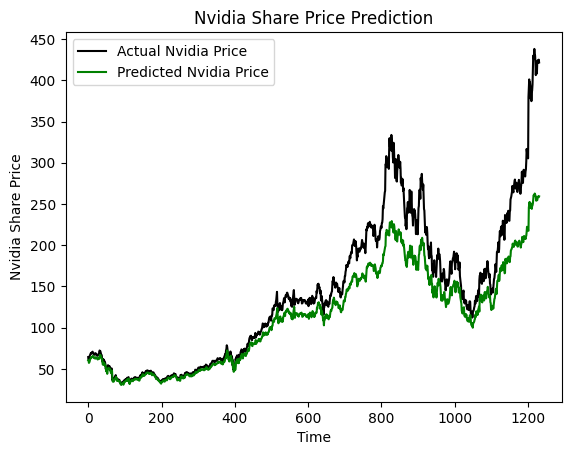

In [26]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=64))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    return model
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [27]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1684.7506154789219


Epoch 1/25
154/154 [==============================] - 5s 7ms/step - loss: 5.7872e-04
Epoch 2/25
154/154 [==============================] - 1s 7ms/step - loss: 3.0993e-05
Epoch 3/25
154/154 [==============================] - 1s 8ms/step - loss: 2.3652e-05
Epoch 4/25
154/154 [==============================] - 1s 7ms/step - loss: 2.4019e-05
Epoch 5/25
154/154 [==============================] - 1s 7ms/step - loss: 2.4272e-05
Epoch 6/25
154/154 [==============================] - 1s 7ms/step - loss: 2.3332e-05
Epoch 7/25
154/154 [==============================] - 1s 8ms/step - loss: 2.3339e-05
Epoch 8/25
154/154 [==============================] - 1s 8ms/step - loss: 2.1414e-05
Epoch 9/25
154/154 [==============================] - 1s 7ms/step - loss: 2.3926e-05
Epoch 10/25
154/154 [==============================] - 1s 7ms/step - loss: 2.0392e-05
Epoch 11/25
154/154 [==============================] - 1s 8ms/step - loss: 2.1375e-05
Epoch 12/25
154/154 [==============================] - 1s 7ms/s

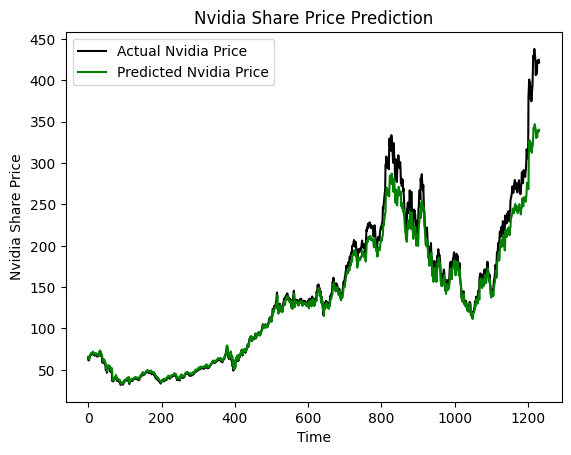

In [28]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=128))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    return model
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)



# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [29]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 318.86811182230434


Epoch 1/25
154/154 [==============================] - 3s 2ms/step - loss: 4.8124e-04
Epoch 2/25
154/154 [==============================] - 0s 3ms/step - loss: 1.4697e-05
Epoch 3/25
154/154 [==============================] - 0s 2ms/step - loss: 1.2064e-05
Epoch 4/25
154/154 [==============================] - 0s 2ms/step - loss: 1.2218e-05
Epoch 5/25
154/154 [==============================] - 0s 2ms/step - loss: 1.1399e-05
Epoch 6/25
154/154 [==============================] - 0s 2ms/step - loss: 1.2422e-05
Epoch 7/25
154/154 [==============================] - 0s 2ms/step - loss: 1.2974e-05
Epoch 8/25
154/154 [==============================] - 0s 2ms/step - loss: 1.2032e-05
Epoch 9/25
154/154 [==============================] - 0s 2ms/step - loss: 1.1657e-05
Epoch 10/25
154/154 [==============================] - 0s 2ms/step - loss: 1.2934e-05
Epoch 11/25
154/154 [==============================] - 0s 3ms/step - loss: 1.3209e-05
Epoch 12/25
154/154 [==============================] - 0s 2ms/s

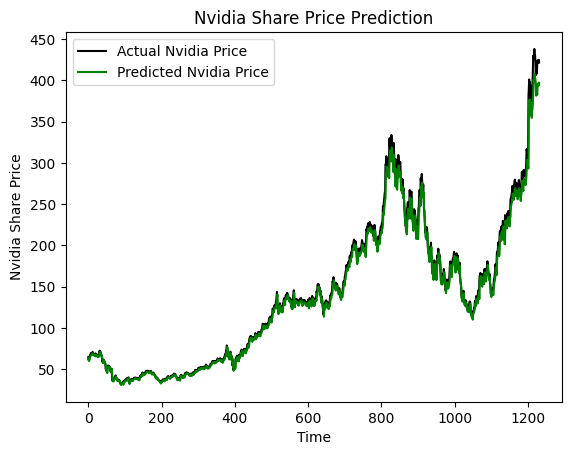

In [30]:

def LSTM_model():
    model = Sequential()
    
    # İlk LSTM katmanı
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    # İkinci LSTM katmanı
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    
    # Son birim (Dense) katman
    model.add(Dense(units=1))
    
    return model

model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Modeli kullanarak tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri yeniden şekillendirin
predicted_prices = predicted_prices.reshape(-1, 1)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)


# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()

In [31]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 72.66639158977321


Epoch 1/25
154/154 [==============================] - 2s 2ms/step - loss: 4.6262e-04
Epoch 2/25
154/154 [==============================] - 0s 2ms/step - loss: 5.4397e-05
Epoch 3/25
154/154 [==============================] - 0s 1ms/step - loss: 8.6249e-06
Epoch 4/25
154/154 [==============================] - 0s 1ms/step - loss: 7.9274e-06
Epoch 5/25
154/154 [==============================] - 0s 1ms/step - loss: 8.0287e-06
Epoch 6/25
154/154 [==============================] - 0s 1ms/step - loss: 7.4787e-06
Epoch 7/25
154/154 [==============================] - 0s 1ms/step - loss: 7.4231e-06
Epoch 8/25
154/154 [==============================] - 0s 1ms/step - loss: 7.9045e-06
Epoch 9/25
154/154 [==============================] - 0s 1ms/step - loss: 7.1045e-06
Epoch 10/25
154/154 [==============================] - 0s 2ms/step - loss: 7.4270e-06
Epoch 11/25
154/154 [==============================] - 0s 2ms/step - loss: 6.7925e-06
Epoch 12/25
154/154 [==============================] - 0s 1ms/s

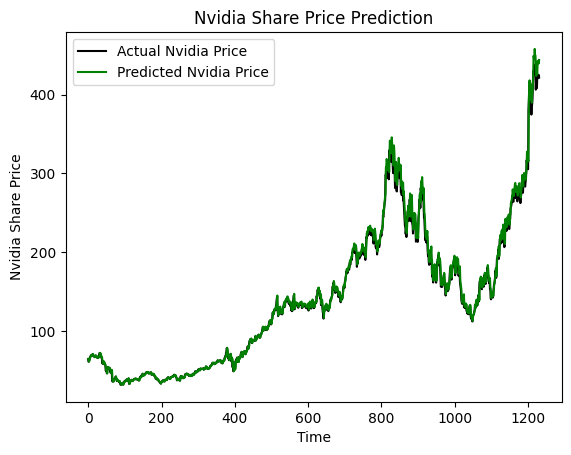

In [32]:
def LSTM_model():
    model = Sequential()
    
    # Tek bir LSTM katmanı
    model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    # Çıkış katmanı
    model.add(Dense(units=1))
    
    return model
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Modeli kullanarak tahminler yapın
predicted_prices = model.predict(x_test)

# Tahminleri yeniden şekillendirin
predicted_prices = predicted_prices.reshape(-1, 1)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)


# Gerçek ve tahmin edilen fiyatları çizdirin
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()


In [33]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 50.7095754072561


Epoch 1/25
154/154 [==============================] - 2s 2ms/step - loss: 6.9038e-04
Epoch 2/25
154/154 [==============================] - 0s 1ms/step - loss: 1.6704e-04
Epoch 3/25
154/154 [==============================] - 0s 1ms/step - loss: 1.0696e-05
Epoch 4/25
154/154 [==============================] - 0s 1ms/step - loss: 8.7390e-06
Epoch 5/25
154/154 [==============================] - 0s 1ms/step - loss: 9.8912e-06
Epoch 6/25
154/154 [==============================] - 0s 1ms/step - loss: 8.6605e-06
Epoch 7/25
154/154 [==============================] - 0s 1ms/step - loss: 8.1526e-06
Epoch 8/25
154/154 [==============================] - 0s 1ms/step - loss: 8.3455e-06
Epoch 9/25
154/154 [==============================] - 0s 1ms/step - loss: 8.0521e-06
Epoch 10/25
154/154 [==============================] - 0s 1ms/step - loss: 7.7537e-06
Epoch 11/25
154/154 [==============================] - 0s 1ms/step - loss: 8.0212e-06
Epoch 12/25
154/154 [==============================] - 0s 1ms/s

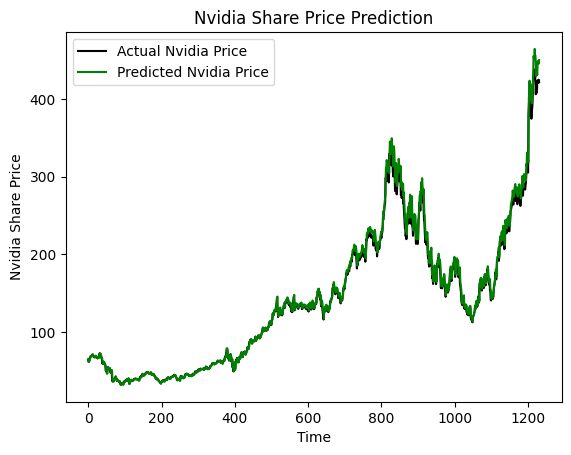

In [34]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

# Modeli oluşturma ve derleme
model = LSTM_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Modeli kullanarak tahminler yapma
predicted_prices = model.predict(x_test)

# Tahminleri yeniden şekillendirme
predicted_prices = predicted_prices.reshape(-1, 1)

# Tahminleri ters ölçekleme ve gerçek değerlerle karşılaştırma
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

# Gerçek ve tahmin edilen fiyatları çizdirme
plt.plot(actual_prices, color='black', label="Actual Nvidia Price")
plt.plot(predicted_prices, color='green', label="Predicted Nvidia Price")
plt.title("Nvidia Share Price Prediction")
plt.xlabel("Time")
plt.ylabel("Nvidia Share Price")
plt.legend()
plt.show()

In [35]:
# Hata hesaplama
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 64.03265303879974
